# <center> Week - 6 Assignment

<center> DSC-530

<center> Kalyan Pothineni

In [1]:
# Retrieve the file from URL, add more files as needed down the line, better to group all the files which are been called

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

## Exercise 7-1

In [2]:
# Import the libraries as needed
import thinkstats2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import thinkplot

# Importing the nsfg and loading the data to dataframe preg
import nsfg

In [3]:
# dataframe = preg
preg = nsfg.ReadFemPreg()
preg.head()

caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
0       1         1        NaN        NaN       NaN       NaN       6.0   
1       1         2        NaN        NaN       NaN       NaN       6.0   
2       2         1        NaN        NaN       NaN       NaN       5.0   
3       2         2        NaN        NaN       NaN       NaN       6.0   
4       2         3        NaN        NaN       NaN       NaN       6.0   

   pregend2  nbrnaliv  multbrth  ...  laborfor_i  religion_i  metro_i  \
0       NaN       1.0       NaN  ...           0           0        0   
1       NaN       1.0       NaN  ...           0           0        0   
2       NaN       3.0       5.0  ...           0           0        0   
3       NaN       1.0       NaN  ...           0           0        0   
4       NaN       1.0       NaN  ...           0           0        0   

       basewgt  adj_mod_basewgt      finalwgt  secu_p  sest  cmintvw  \
0  3410.389399      3869.349602   6448.271112       2     9      NaN   
1  3410.389399      3869.349602   6448.271112       2     9      NaN   
2  7226.301740      8567.549110  12999.542264       2    12      NaN   
3  7226.301740      8567.549110  12999.542264       2    12      NaN   
4  7226.301740      8567.549110  12999.542264       2    12      NaN   

   totalwgt_lb  
0       8.8125  
1       7.8750  
2       9.1250  
3       7.0000  
4       6.1875  

[5 rows x 244 columns]

In [4]:
# Extract the required variables from the dataset
birth_weight = preg.birthwgt_lb * 16 + preg.birthwgt_oz  # Convert pounds to ounces
mother_age = preg.agepreg

In [5]:
# Remove rows with missing values
valid_data = np.logical_and(~np.isnan(birth_weight), ~np.isnan(mother_age))
birth_weight = birth_weight[valid_data]
mother_age = mother_age[valid_data]

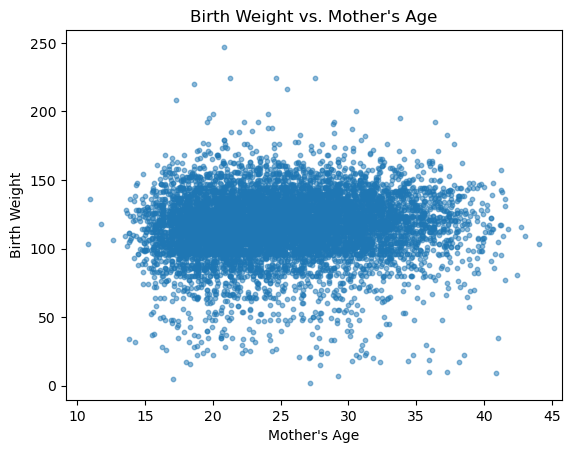

In [6]:
# Create the scatter plot

plt.scatter(mother_age, birth_weight, alpha=0.5, s=10)
plt.xlabel("Mother's Age")
plt.ylabel("Birth Weight")
plt.title("Birth Weight vs. Mother's Age")
plt.show()


In [7]:
# Calculate Pearson's and Spearman's correlations
pearson_corr = thinkstats2.Corr(mother_age, birth_weight)
spearman_corr = thinkstats2.SpearmanCorr(mother_age, birth_weight)

# Print the correlation
print("Pearson Correlation:", pearson_corr)
print("spearman Correlation:", spearman_corr)

Pearson Correlation: 0.0688339703541091
spearman Correlation: 0.09461004109658226


In [8]:
# Calculate percentiles of birth weight based on mother's age
df = pd.DataFrame({'birth_weight': birth_weight, 'mother_age': mother_age})
percentiles = df.groupby('mother_age')['birth_weight'].quantile([0.25, 0.5, 0.75]).unstack()

In [9]:
# Print the percentiles
print("Percentiles of Birth Weight in ounces based on Mother's Age:")
print(percentiles)

Percentiles of Birth Weight in ounces based on Mother's Age:
             0.25   0.50   0.75
mother_age                     
10.83       103.0  103.0  103.0
10.91       136.0  136.0  136.0
11.75       118.0  118.0  118.0
12.66       106.0  106.0  106.0
13.50       109.0  109.0  109.0
...           ...    ...    ...
41.75       114.0  114.0  114.0
42.41        81.0   81.0   81.0
42.75       116.0  116.0  116.0
43.00       109.0  109.0  109.0
44.08       103.0  103.0  103.0

[340 rows x 3 columns]


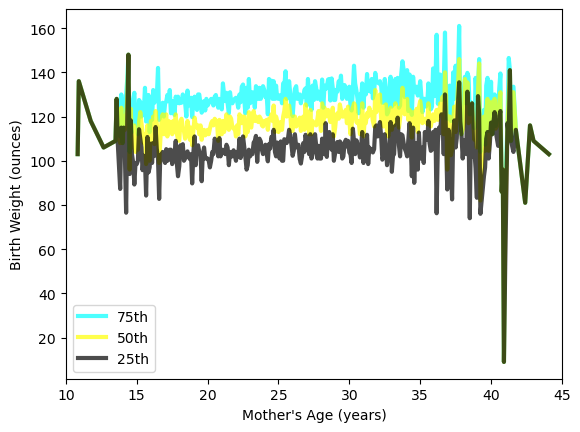

In [10]:
# Plot percentiles
colors = ['cyan', 'yellow', 'black']
for i, percent in enumerate([0.75, 0.5, 0.25]):
    weights = percentiles[percent]
    label = '%dth' % (percent * 100)
    thinkplot.Plot(weights.index, weights.values, label=label, color=colors[i])

thinkplot.Config(xlabel="Mother's Age (years)",
                 ylabel='Birth Weight (ounces)',
                 xlim=[10, 45], legend=True)

plt.show()

The code loads the NSFG dataset and extracts the variables birth_weight and mother_age, filtering out missing values. It then calculates percentiles of birth weight based on mother's age and creates a line graph to visualize the 25th, 50th, and 75th percentiles.

## Exercise 8-1

In [11]:
# import the libraries as needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [12]:
# Set parameters
mu = 0  # True population mean
sigma = 1  # True population standard deviation
num_datasets = 10000  # Number of datasets to simulate
sample_sizes = range(5, 101, 5)  # Different sample sizes

In [13]:
# Create a DataFrame to store the results in next step
results = pd.DataFrame(index=sample_sizes, columns=['Bias x̄', 'Bias Median', 'MSE x̄', 'MSE Median'])

In [14]:
# Simulate datasets and compute estimates
for n in sample_sizes:
    biases_xbar = []
    biases_median = []
    mse_xbar = []
    mse_median = []

    for _ in range(num_datasets):
        # Generate dataset from the population distribution
        data = np.random.normal(mu, sigma, size=n)

        # Calculate estimates
        xbar = np.mean(data)
        median = np.median(data)
        s2 = np.var(data, ddof=0)  # biased estimator
        s2n1 = np.var(data, ddof=1)  # unbiased estimator

        # Calculate bias
        bias_xbar = xbar - mu
        bias_median = median - mu

        # Calculate mean squared error (MSE)
        mse_xbar.append((xbar - mu) ** 2)
        mse_median.append((median - mu) ** 2)

        # Append biases
        biases_xbar.append(bias_xbar)
        biases_median.append(bias_median)

    # Compute average biases and MSE
    results.loc[n, 'Bias x̄'] = np.mean(biases_xbar)
    results.loc[n, 'Bias Median'] = np.mean(biases_median)
    results.loc[n, 'MSE x̄'] = np.mean(mse_xbar)
    results.loc[n, 'MSE Median'] = np.mean(mse_median)

Text(0.5, 1.0, 'Bias of x̄ and Median')

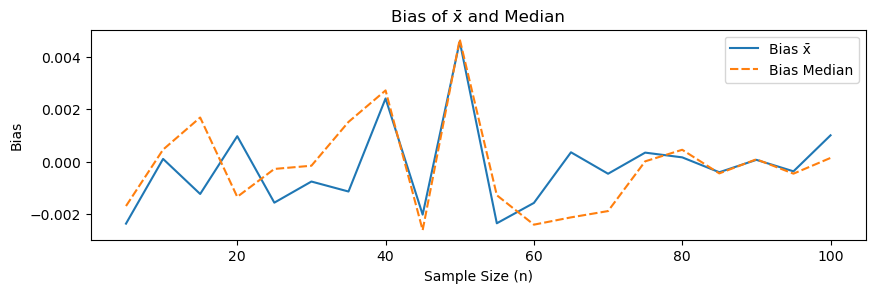

In [15]:
# Plot bias and MSE
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.lineplot(data=results[['Bias x̄', 'Bias Median']])
plt.xlabel('Sample Size (n)')
plt.ylabel('Bias')
plt.title('Bias of x̄ and Median')


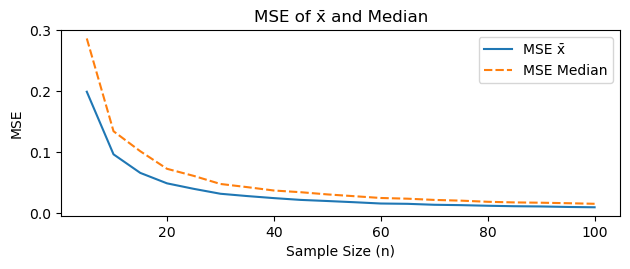

In [16]:
plt.subplot(2, 1, 2)
sns.lineplot(data=results[['MSE x̄', 'MSE Median']])
plt.xlabel('Sample Size (n)')
plt.ylabel('MSE')
plt.title('MSE of x̄ and Median')

plt.tight_layout()
plt.show()


Above code performs a simulation study to investigate the bias and mean squared error (MSE) of the sample mean (x̄) and median estimators for different sample sizes. It generates datasets from a normal distribution, calculates the estimates and biases, and computes the MSE for both estimators. The code then plots the biases and MSEs as a function of the sample size using line plots.

## Exercise 8-2

In [17]:
# import the libraries as needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
# Set the parameters
lamda = 2
n = 10
num_simulations = 1000

In [19]:
# Simulate the experiment
estimates = []
for _ in range(num_simulations):
    sample = np.random.exponential(scale=1/lamda, size=n)
    estimate = 1 / np.mean(sample)  # Estimate of parameter
    estimates.append(estimate)
#estimates

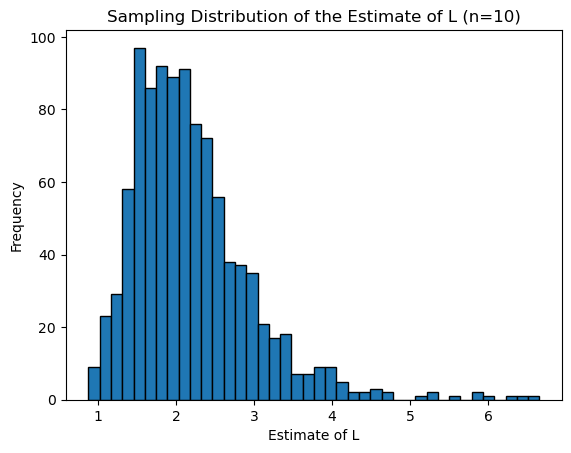

In [20]:
# Plot the sampling distribution
plt.hist(estimates, bins=40, edgecolor='black')
plt.xlabel('Estimate of L')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Estimate of L (n=10)')
plt.show()

In [21]:
# Compute the standard error
se = np.std(estimates)

In [22]:
# Compute the confidence interval
alpha = 0.1  # 90% confidence interval
z_critical = stats.norm.ppf(1 - alpha/2)  # Z-score for the critical value
ci_lower = np.mean(estimates) - z_critical * se
ci_upper = np.mean(estimates) + z_critical * se

In [23]:
print("Standard Error:", se)
print(f'90% Confidence Interval: ({ci_lower}, {ci_upper})')

Standard Error: 0.7720323844475082
90% Confidence Interval: (0.9263507561229134, 3.466111291487868)


In [24]:
# Repeat the experiment with different values of n
ns = [10, 20, 30, 40, 50, 60, 70, 80, 90]
standard_errors = []

In [25]:
for n in ns:
    estimates = []
    for _ in range(num_simulations):
        sample = np.random.exponential(scale=1/lamda, size=n)
        estimate = 1 / np.mean(sample)  # Estimate of parameter
        estimates.append(estimate)

    se = np.std(estimates)
    standard_errors.append(se)

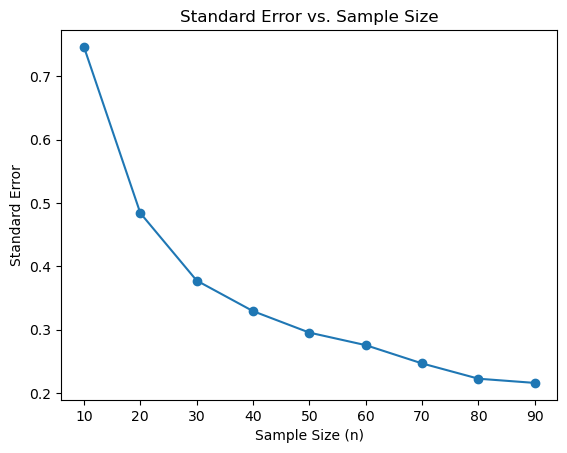

In [26]:
# Plot standard error versus n
plt.plot(ns, standard_errors, marker='o')
plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error')
plt.title('Standard Error vs. Sample Size')
plt.show()


In [1]:
import pandas as pd

# Sample sales data
data = {
    'Salesperson': ['Alice', 'Bob', 'Alice', 'Bob', 'Alice', 'Bob', 'Charlie', 'Charlie'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'C', 'B', 'A'],
    'SalesAmount': [100, 200, 150, 120, 180, 250, 170, 140]
}



In [2]:
# Create a DataFrame
df = pd.DataFrame(data)


In [3]:
df


Salesperson Product  SalesAmount
0       Alice       A          100
1         Bob       B          200
2       Alice       A          150
3         Bob       B          120
4       Alice       A          180
5         Bob       C          250
6     Charlie       B          170
7     Charlie       A          140

In [4]:

# Create a pivot table to summarize sales amount by product and salesperson
pivot_table = pd.pivot_table(df, values='SalesAmount', index='Salesperson', columns='Product', aggfunc='sum', fill_value=0)

print(pivot_table)

Product        A    B    C
Salesperson               
Alice        430    0    0
Bob            0  320  250
Charlie      140  170    0


This code simulates an experiment where a sample of size 10 is drawn from an exponential distribution with λ=2. It then plots the sampling distribution of the estimate of the parameter L and computes the standard error and a 90% confidence interval for the estimate.

Additionally, the experiment is repeated with different sample sizes (10, 20, 30, 40, 50, 60, 70, 80, 90), and the code plots the standard error as a function of sample size to observe the relationship between them.